# Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif, SelectKBest

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(0)

In [3]:
df_X = pd.read_csv("SpaceX_ML_Predict_X.csv")
df_y = pd.read_csv("SpaceX_ML_Predict_y.csv")

In [4]:
df_X.shape, df_y.shape

((138, 93), (138, 1))

In [5]:
print("Size of Train Split:\t{:.0f}".format(np.round(df_X.shape[0]*(1-0.2))))
print("Size of Test Split:\t{:.0f}".format(df_X.shape[0] - np.round(df_X.shape[0]*(1-0.2))))

Size of Train Split:	110
Size of Test Split:	28


# Iteration

## Random Seeds

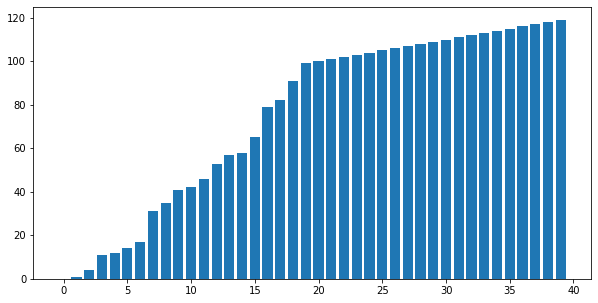

In [9]:
random_seeds = np.append(np.random.randint(0, 100, 20), np.linspace(100, 119, 20))
random_seeds.sort()
random_seeds = random_seeds.astype('int')

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x=np.linspace(0, 39, 40), height=random_seeds)
plt.show()

## Loop

In [10]:
classifiers = ["Logistic Regression", "Support Vector Machine", "Decision Tree", "K-Nearest Neighbors"]
features = ["All", "Selected"]
folds = ["Train", "Test"]
cols2 = []
cols3 = []

for clas in classifiers:
    for feat in features:
        cols2.append((clas, feat))
            
for clas in classifiers:
    for feat in features:
        for fold in folds:
            cols3.append((clas, feat, fold))
            
cols2 = pd.MultiIndex.from_tuples(cols2)
cols3 = pd.MultiIndex.from_tuples(cols3)

In [11]:
df_rs = pd.DataFrame(index=random_seeds, columns=cols3)
df_trn_id = pd.DataFrame(index=random_seeds, columns=np.arange(np.round(df_X.shape[0]*(1-0.2))))
df_tst_id = pd.DataFrame(index=random_seeds, columns=np.arange(df_X.shape[0] - np.round(df_X.shape[0]*(1-0.2))))
df_bp = pd.DataFrame(index=random_seeds, columns=cols2)

In [12]:
for i, rs in enumerate(random_seeds):
    
# Train Test Split
    df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=rs)
    X_train = df_X_train.to_numpy()
    X_test = df_X_test.to_numpy()
    y_train = df_y_train.to_numpy().ravel()
    y_test = df_y_test.to_numpy().ravel()
    
# Indices of Train and Test Splits
    for j in range(df_trn_id.shape[1]):
        df_trn_id.iloc[i,j] = df_X_train.index[j]
    for j in range(df_tst_id.shape[1]):
        df_tst_id.iloc[i,j] = df_X_test.index[j]
        
# Logistic Regression - All Features
    pipe_lr_all = Pipeline([("scaler", StandardScaler()),
                            ("lr", LogisticRegression())])
    param_lr_all ={"lr__C":[0.001, 0.01, 0.1, 1, 10, 100],
                   'lr__penalty':['l2'],
                   'lr__solver':['lbfgs']}
    grid_lr_all = GridSearchCV(pipe_lr_all,
                               param_grid=param_lr_all,
                               cv=10,
                               n_jobs=3)
    grid_lr_all.fit(X_train, y_train)
    cv_score_lr_all = grid_lr_all.best_score_
    score_lr_all = grid_lr_all.score(X_test, y_test)
    df_rs.iloc[i,0] = cv_score_lr_all
    df_rs.iloc[i,1] = score_lr_all
    df_bp.iloc[i,0] = str(grid_lr_all.best_params_)
    
# Support Vector Machine - All Features
    pipe_svm_all = Pipeline([("scaler", StandardScaler()),
                             ("svm", SVC())])
    param_svm_all = {'svm__kernel':['linear', 'rbf', 'poly', 'sigmoid'],
                     'svm__C': np.logspace(-3, 3, 5),
                     'svm__gamma':np.logspace(-3, 2, 6)}
    grid_svm_all = GridSearchCV(pipe_svm_all,
                                param_grid=param_svm_all,
                                cv=10,
                                n_jobs=3)
    grid_svm_all.fit(X_train, y_train)
    cv_score_svm_all = grid_svm_all.best_score_
    score_svm_all = grid_svm_all.score(X_test, y_test)
    df_rs.iloc[i,4] = cv_score_svm_all
    df_rs.iloc[i,5] = score_svm_all
    df_bp.iloc[i,2] = str(grid_svm_all.best_params_)
    
# Decision Tree - All Features
    pipe_dt_all = Pipeline([("scaler", StandardScaler()),
                            ("dt", DecisionTreeClassifier())])
    param_dt_all = {'dt__criterion': ['gini', 'entropy'],
                    'dt__splitter': ['best', 'random'],
                    'dt__max_depth': [2*n for n in range(1,10)],
                    'dt__max_features': ['auto', 'sqrt'],
                    'dt__min_samples_leaf': [1, 2, 4],
                    'dt__min_samples_split': [2, 5, 10]}
    grid_dt_all = GridSearchCV(pipe_dt_all,
                               param_grid=param_dt_all,
                               cv=10,
                               n_jobs=3)
    grid_dt_all.fit(X_train, y_train)
    cv_score_dt_all = grid_dt_all.best_score_
    score_dt_all = grid_dt_all.score(X_test, y_test)
    df_rs.iloc[i,8] = cv_score_dt_all
    df_rs.iloc[i,9] = score_dt_all
    df_bp.iloc[i,4] = str(grid_dt_all.best_params_)
    
# K-Nearest Neighbors - All Features
    pipe_knn_all = Pipeline([("scaler", StandardScaler()),
                             ("knn", KNeighborsClassifier())])
    param_knn_all = {'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                     'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                     'knn__p': [1,2]}
    grid_knn_all = GridSearchCV(pipe_knn_all,
                                param_grid=param_knn_all,
                                cv=10,
                                n_jobs=3)
    grid_knn_all.fit(X_train, y_train)
    cv_score_knn_all = grid_knn_all.best_score_
    score_knn_all = grid_knn_all.score(X_test, y_test)
    df_rs.iloc[i,12] = cv_score_knn_all
    df_rs.iloc[i,13] = score_knn_all
    df_bp.iloc[i,6] = str(grid_knn_all.best_params_)
    
# Logistic Regression - Selected Features
    pipe_lr_selected = Pipeline([("selector", SelectKBest()),
                                 ("scaler", StandardScaler()),
                                 ("lr", LogisticRegression())])
    param_lr_selected ={'selector__score_func':[f_classif],
                        'selector__k':[10],
                        "lr__C":[0.001, 0.01, 0.1, 1, 10, 100],
                        'lr__penalty':['l2'],
                        'lr__solver':['lbfgs']}
    grid_lr_selected = GridSearchCV(pipe_lr_selected,
                                    param_grid=param_lr_selected,
                                    cv=10,
                                    n_jobs=3)
    grid_lr_selected.fit(X_train, y_train)
    cv_score_lr_selected = grid_lr_selected.best_score_
    score_lr_selected = grid_lr_selected.score(X_test, y_test)
    df_rs.iloc[i,2] = cv_score_lr_selected
    df_rs.iloc[i,3] = score_lr_selected
    df_bp.iloc[i,1] = str(grid_lr_selected.best_params_)

# Support Vector Machine - Selected Features
    pipe_svm_selected = Pipeline([("selector", SelectKBest()),
                                  ("scaler", StandardScaler()),
                                  ("svm", SVC())])
    param_svm_selected = {'selector__score_func':[f_classif],
                          'selector__k':[10],
                          'svm__kernel':['linear', 'rbf', 'poly', 'sigmoid'],
                          'svm__C': np.logspace(-3, 3, 5),
                          'svm__gamma':np.logspace(-3, 2, 6)}
    grid_svm_selected = GridSearchCV(pipe_svm_selected,
                                     param_grid=param_svm_selected,
                                     cv=10,
                                     n_jobs=3)
    grid_svm_selected.fit(X_train, y_train)
    cv_score_svm_selected = grid_svm_selected.best_score_
    score_svm_selected = grid_svm_selected.score(X_test, y_test)
    df_rs.iloc[i,6] = cv_score_svm_selected
    df_rs.iloc[i,7] = score_svm_selected
    df_bp.iloc[i,3] = str(grid_svm_selected.best_params_)
    
# Decision Tree - Selected Features
    pipe_dt_selected = Pipeline([("selector", SelectKBest()),
                                 ("scaler", StandardScaler()),
                                 ("dt", DecisionTreeClassifier())])
    param_dt_selected = {'selector__score_func':[f_classif],
                         'selector__k':[10],
                         'dt__criterion': ['gini', 'entropy'],
                         'dt__splitter': ['best', 'random'],
                         'dt__max_depth': [2*n for n in range(1,10)],
                         'dt__max_features': ['auto', 'sqrt'],
                         'dt__min_samples_leaf': [1, 2, 4],
                         'dt__min_samples_split': [2, 5, 10]}
    grid_dt_selected = GridSearchCV(pipe_dt_selected,
                                    param_grid=param_dt_selected,
                                    cv=10,
                                    n_jobs=3)
    grid_dt_selected.fit(X_train, y_train)
    cv_score_dt_selected = grid_dt_selected.best_score_
    score_dt_selected = grid_dt_selected.score(X_test, y_test)
    df_rs.iloc[i,10] = cv_score_dt_selected
    df_rs.iloc[i,11] = score_dt_selected
    df_bp.iloc[i,5] = str(grid_dt_selected.best_params_)

# K-Nearest Neighbors - Selected Features
    pipe_knn_selected = Pipeline([("selector", SelectKBest()),
                                  ("scaler", StandardScaler()),
                                  ("knn", KNeighborsClassifier())])
    param_knn_selected = {'selector__score_func':[f_classif],
                          'selector__k':[10],
                          'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                          'knn__p': [1,2]}
    grid_knn_selected = GridSearchCV(pipe_knn_selected,
                                     param_grid=param_knn_selected,
                                     cv=10,
                                     n_jobs=3)
    grid_knn_selected.fit(X_train, y_train)
    cv_score_knn_selected = grid_knn_selected.best_score_
    score_knn_selected = grid_knn_selected.score(X_test, y_test)
    df_rs.iloc[i,14] = cv_score_knn_selected
    df_rs.iloc[i,15] = score_knn_selected
    df_bp.iloc[i,7] = str(grid_knn_selected.best_params_)

In [13]:
with pd.ExcelWriter("SpaceX_ML_Predict_Random_Seeds.xlsx") as writer:
    df_rs.to_excel(writer, sheet_name="Accuracies", index_label="Random Seed")
    df_trn_id.to_excel(writer, sheet_name="Train Split Indices", index_label="Random Seed")
    df_tst_id.to_excel(writer, sheet_name="Test_Split Indices", index_label="Random Seed")
    df_bp.to_excel(writer, sheet_name="Best Parameters", index_label="Random Seed")